# Visualise Data
## Foreword
In this notebook, I will attempt to visualise data. To do so, I will utilise different packages which are famous for takling data science topics. Here's a list of the packages I will use.<br>
<ul>
    <li>
        pandas
    </li>
    <li>
        matplotlib
    </li>
    <li>
        seaborn
    </li>
    <li>
        to be continued
    </li>
</ul>
<br>
To do so, I will dedicate one section for each package. But be aware that I will not go into detail. This notebook aims to convey a <i>first impression</i> of the packages I will use here. If all goes well, more detail will be added in later notebooks.

## Packages
But before I start, I have to import some packages I need.

In [1]:
%matplotlib inline

import logging
import pandas as pd
import matplotlib as plt

## Logger
First, let me initialise python's logging package.

In [2]:
# Initialise Logger
log = logging.getLogger('visualise_data_notebook')
log.setLevel(logging.INFO)

formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

fh = logging.FileHandler('log/visualise_data.log')
fh.setLevel(logging.INFO)
fh.setFormatter(formatter)

log.addHandler(fh)

## Data
Since I have initalised a logger, I now have to think about what data I want to visualise. To find a nice data set I browsed <a href='http://www.kaggle.com'>kaggle</a>. Kaggle is one of many adresses where you can find data sets available for personal usage.<br><br>
I decided to go for the <a href='https://www.kaggle.com/xvivancos/barcelona-data-sets'>Barcelona data sets</a>. By just looking at it, I had the feeling that it is an easy to understand data set which provides some possiblities for visualising data. Now let me put some hands on it and see what the data tries to tell.

## Pandas
TO DO
### Explore Data
First, let me import the data I want to explore. I decided for births.csv in the Barcelona data sets. Now, after I figured out the realtive path to the data, I checked how the values are separated from each other. Note that this is quite essential for, otherwise, data would not be imported correctly. Finally, I can import the data using pandas.<br>
In a second step, I use the <code>head()</code> function to just get an impression of how my data really looks like. Here it becomes clear what I really enjoy about jupyter - the data is illustrated quite accurately in juypter notbooks. So for data science purposes, jupyter notebooks are just right.

In [3]:
data = pd.read_csv(filepath_or_buffer='data/barcelona-data-sets/births.csv', sep=',')
data.head(5)

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Number
0,2017,1,Ciutat Vella,1,el Raval,Boys,283
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Boys,56
2,2017,1,Ciutat Vella,3,la Barceloneta,Boys,51
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Boys,90
4,2017,2,Eixample,5,el Fort Pienc,Boys,117


After I learned how my data looks like, I am interessted in the data types that are used in my data set. Panda's <code>info()</code> function is just the right tool for that kind of work.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
Year                 734 non-null int64
District Code        734 non-null int64
District Name        734 non-null object
Neighborhood Code    734 non-null int64
Neighborhood Name    734 non-null object
Gender               734 non-null object
Number               734 non-null int64
dtypes: int64(4), object(3)
memory usage: 40.2+ KB


Now, after having acquired some knowledge about my data, I figured out that there's only one numeric column that is really interessting. <i>Number</i> is the only column that tells us how many babies were born between 2013 an 2017. Let's check out how this data is distributed.

In [5]:
data['Number'].describe()

count    734.000000
mean      91.754768
std       61.928488
min        0.000000
25%       43.250000
50%       84.500000
75%      129.250000
max      283.000000
Name: Number, dtype: float64

Another thing I am interested in is <i>Does birth rate change over years?</i> To find out just about that, I used my data, filtered each year separately, selected the column I am interested in and finally summed up each value.

In [6]:
number_of_births_in_13 = data[data['Year'] == 2013]['Number'].sum()
number_of_births_in_14 = data[data['Year'] == 2014]['Number'].sum()
number_of_births_in_15 = data[data['Year'] == 2015]['Number'].sum()
number_of_births_in_16 = data[data['Year'] == 2016]['Number'].sum()
number_of_births_in_17 = data[data['Year'] == 2017]['Number'].sum()

With these values, it is possible to create an individual data frame which can be used to plot the newly generated data.

Text(0, 0.5, 'Number of births')

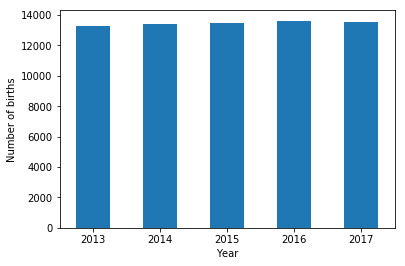

In [7]:
births_in_year_x = pd.DataFrame({'Year':[2013, 
                                         2014, 
                                         2015, 
                                         2016, 
                                         2017], 
                                 'Number of births':[number_of_births_in_13, 
                                                     number_of_births_in_14, 
                                                     number_of_births_in_15, 
                                                     number_of_births_in_16, 
                                                     number_of_births_in_17]})
axs = births_in_year_x.plot.bar(x='Year', rot=0, legend=False)
axs.set_ylabel('Number of births')

At first glance, this plot looks quite good. Unfortunately, though, this plot does not seem to make clear whether there is a change between 2013 and 2017. Maybe it becomes clearer by adding grid lines.

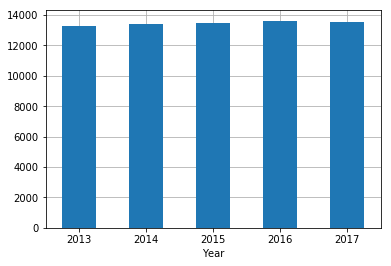

In [8]:
axs = births_in_year_x.plot.bar(x='Year', rot=0, legend=False)
axs.grid()
axs.set_axisbelow(True)

Now, a change between 2013 and 2017 becomes visible. Since the space between the bars and the upper horizontal grind line becomes smaller, I can conclude that the number of births increased between 2013 and 2016. I can also conclude that the number of births fell between 2016 and 2017.

### Take a closer look
In this section, I would like to know whether there are some differences between the districts. Meaning, I want to know how birth rate varies from district to district. To do so, I collect a list of all districts. 

In [9]:
districts = data['District Name'].unique()

After having done that, I want to collect the number of births in each district in year x. To make life simpler, I defined a function that just does that.

In [10]:
def map_each_district_to_number_of_births_in_year_x(districts, year):
    number_of_birth_per_district = {}
    for district in districts:
        number_of_birth_per_district[district] = data[(data['Year'] == year) & 
                                                      (data['District Name'] == district)]['Number'].sum()
    return number_of_birth_per_district

In case you have a simpler solution, please let me know. As I said previously, these are my first attempts with both python and data science.

In [11]:
number_of_births_in_each_district_in_2017 = map_each_district_to_number_of_births_in_year_x(districts, 2017)
number_of_births_in_each_district_in_2016 = map_each_district_to_number_of_births_in_year_x(districts, 2016)
number_of_births_in_each_district_in_2015 = map_each_district_to_number_of_births_in_year_x(districts, 2015)
number_of_births_in_each_district_in_2014 = map_each_district_to_number_of_births_in_year_x(districts, 2014)
number_of_births_in_each_district_in_2013 = map_each_district_to_number_of_births_in_year_x(districts, 2013)

Now I have a basis to create another data frame in order to visualise the number of births in each district in year 2017. In this example I will use another bar plot for I think it makes the point quite clear.

Text(0, 0.5, 'Number of births')

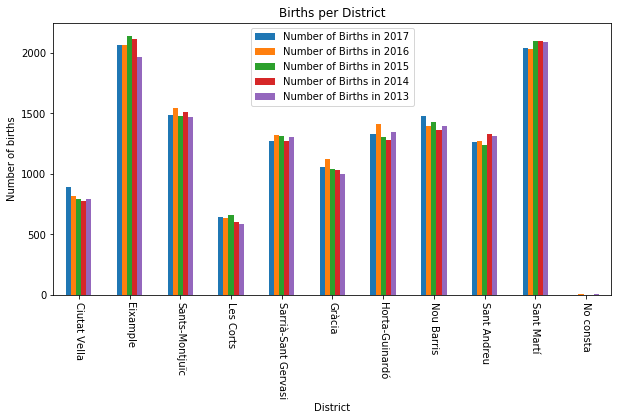

In [12]:
number_of_births_per_district_in_2017 = pd.DataFrame(
    {'District':list(number_of_births_in_each_district_in_2017.keys()), 
     'Number of Births in 2017':list(number_of_births_in_each_district_in_2017.values()),
     'Number of Births in 2016':list(number_of_births_in_each_district_in_2016.values()),
     'Number of Births in 2015':list(number_of_births_in_each_district_in_2015.values()),
     'Number of Births in 2014':list(number_of_births_in_each_district_in_2014.values()),
     'Number of Births in 2013':list(number_of_births_in_each_district_in_2013.values())})

axs_2013_17 = number_of_births_per_district_in_2017.plot.bar(x='District', rot=270, figsize=(10,5), title='Births per District')
axs_2013_17.set_ylabel('Number of births')

With that information, I am curious how the number of births in each neighborhood of one district deviates from the average birth rate of that district in one year. To do so, i have to define the mean value of birth rates in one ditrict in year x and the average number of births in each neighborhood of that very district.<br>
First, I have to define the average number of births in district <i>Eixample</i> in, for instance, 2017.

In [24]:
average_brith_rate_eixample_in_2017 = data[(data['Year'] == 2017) & (data['District Name'] == 'Eixample')]['Number'].sum() / data[(data['Year'] == 2017) & (data['District Name'] == 'Eixample')]['Number'].count()

Then I count the total number of births in each neighborhood in Eixample.

In [28]:
averagE_birth_rate_neigh_code_5_in_2017 = data[(data['Year'] == 2017) & (data['District Name'] == 'Eixample') & (data['Neighborhood Code'] == 5)]['Number'].sum()
averagE_birth_rate_neigh_code_6_in_2017 = data[(data['Year'] == 2017) & (data['District Name'] == 'Eixample') & (data['Neighborhood Code'] == 6)]['Number'].sum()
averagE_birth_rate_neigh_code_7_in_2017 = data[(data['Year'] == 2017) & (data['District Name'] == 'Eixample') & (data['Neighborhood Code'] == 7)]['Number'].sum()
averagE_birth_rate_neigh_code_8_in_2017 = data[(data['Year'] == 2017) & (data['District Name'] == 'Eixample') & (data['Neighborhood Code'] == 8)]['Number'].sum()
averagE_birth_rate_neigh_code_9_in_2017 = data[(data['Year'] == 2017) & (data['District Name'] == 'Eixample') & (data['Neighborhood Code'] == 9)]['Number'].sum()
averagE_birth_rate_neigh_code_10_in_2017 = data[(data['Year'] == 2017) & (data['District Name'] == 'Eixample') & (data['Neighborhood Code'] == 10)]['Number'].sum()

Then I collect all <i>Neighborhood Codes</i> and <i>Neighborhood Names</i> that can be found in, for instance, Eixample.

In [32]:
neighborhood_codes = data[data['District Name'] == 'Eixample']['Neighborhood Code'].unique()
neighborhood_names = data[data['District Name'] == 'Eixample']['Neighborhood Name'].unique()

Finally, I can create a fresh DataFrame which I can use to plot my data with a scatter.

In [ ]:
# 